In [33]:
#Showing directories’ size
import os, shutil

train_dir ='./images/train'
validation_dir = './images/val'
test_dir = './images/test'

train_corona_virus_d = './images/train/Corona_Virus_Disease'
train_normal = './images/train/Normal'
train_tuberculosis= './images/train/Tuberculosis'

val_corona_virus_d = './images/val/Corona_Virus_Disease'
val_normal = './images/val/Normal'
val_tuberculosis= './images/val/Tuberculosis'

test_corona_virus_d = './images/test/Corona_Virus_Disease'
test_normal = './images/test/Normal'
test_tuberculosis= './images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [34]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
)

validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=64)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=64)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


In [35]:
import tensorflow as tf
def process_image(image, label_pi):
    l = tf.one_hot(label_pi, depth=3)
    return image, l

In [36]:
train_dataset = train_dataset.map(process_image)
validation_dataset = validation_dataset.map(process_image)
test_dataset = test_dataset.map(process_image)

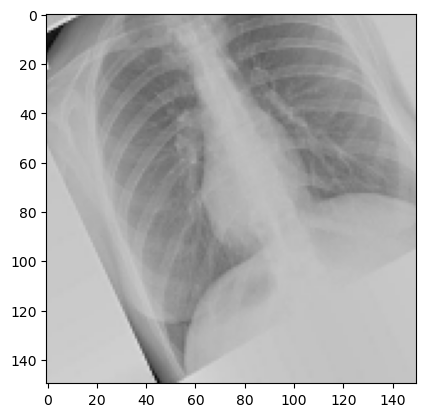

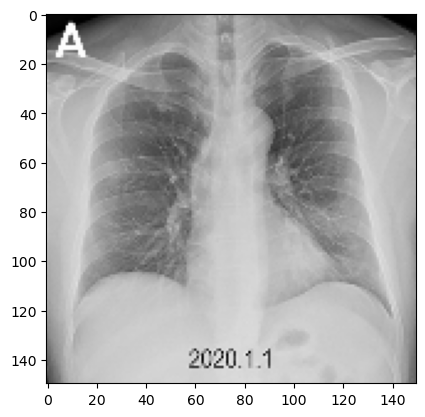

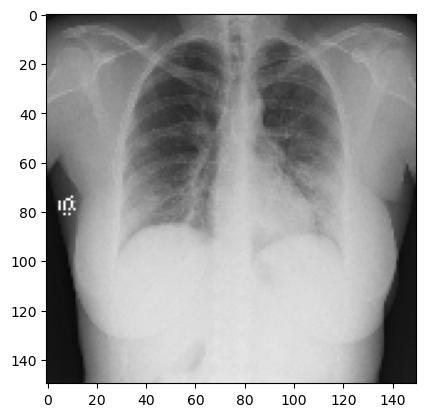

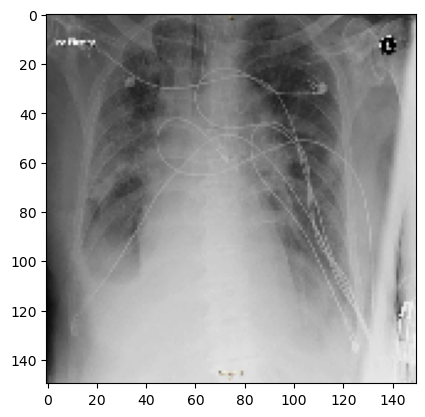

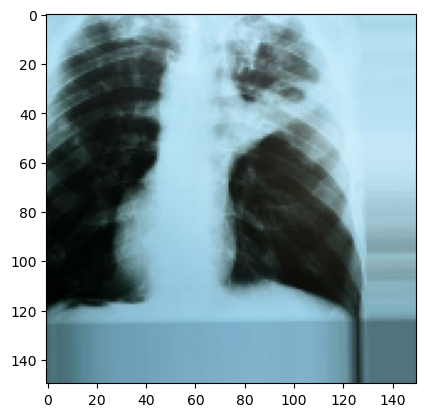

2024-06-01 10:41:59.090175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [38]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
# x = layers.Conv2D(filters=32, kernel_size=12, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)

outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 144, 144, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 144, 144, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 68, 68, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 68, 68, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,448,771 (74.19 MB)

 Trainable params: 19,443,715 (74.17 MB)

 Non-trainable params: 5,056 (19.75 KB)

In [39]:
import tensorflow as tf
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-7),
    metrics=['acc'])

In [40]:
ACCURACY_THRESHOLD = 0.97
class CallbackModel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs.get('acc') > ACCURACY_THRESHOLD:
            print("\nReached %2.2f%% accuracy, so stopping training" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

In [41]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=[CallbackModel()]
)

# model.save('./weights_xray/Model_xray.h5')

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 190ms/step - acc: 0.4497 - loss: 1.2931 - val_acc: 0.3344 - val_loss: 1.4573
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - acc: 0.5619 - loss: 1.0451 - val_acc: 0.3361 - val_loss: 1.5365
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - acc: 0.6326 - loss: 0.8844 - val_acc: 0.4662 - val_loss: 1.5097
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - acc: 0.6723 - loss: 0.7961 - val_acc: 0.5058 - val_loss: 1.2480
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - acc: 0.7020 - loss: 0.7222 - val_acc: 0.6359 - val_loss: 0.8263
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - acc: 0.7305 - loss: 0.6694 - val_acc: 0.7405 - val_loss: 0.6283
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - acc: 0.7560 - loss: 0.6080 - val_acc: 0.7652 - val_loss: 0.5836
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - acc: 0.7752 - loss: 0.5735 - val_acc: 0.7751 - val_loss: 0.5611
Epoch 9/30
114/114 ━━━━━━━━━━━━━

In [42]:
model.save('./Batch_Norm_Model_xray.keras')

In [43]:
keras.models.load_model('./Batch_Norm_Model_xray.keras')

<Functional name=functional_5, built=True>

In [44]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - acc: 0.8720 - loss: 0.3264
val_acc: 0.8706754446029663


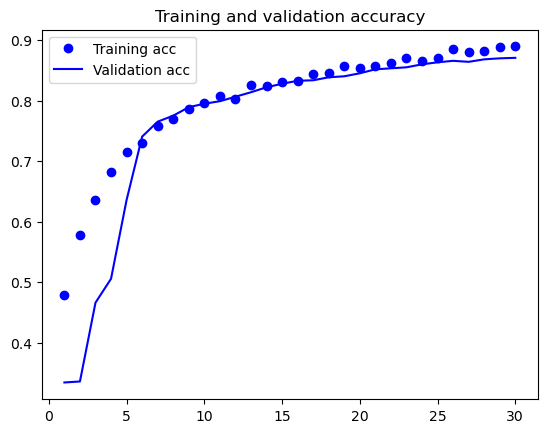

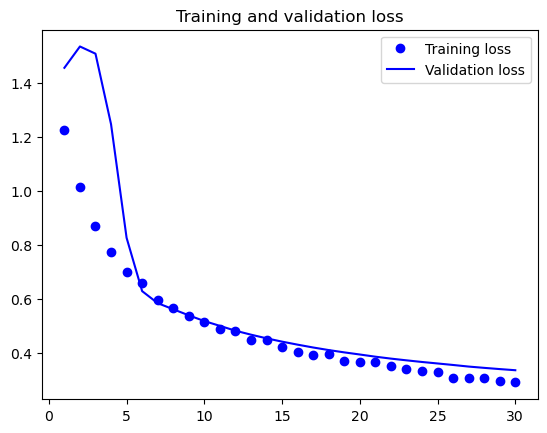

In [45]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

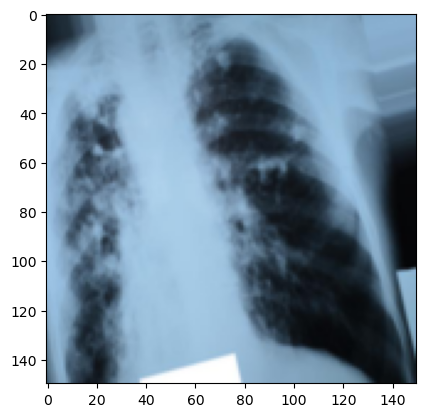

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [47]:

# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('./images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2024-06-01 11:04:58.116945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


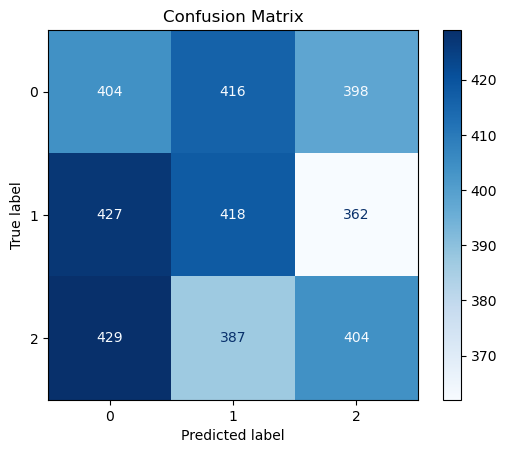

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_labels = model.predict(train_dataset)
predicted_labels = np.argmax(predicted_labels, axis=1) 

true_labels = []
for _, label in train_dataset:
    true_labels.extend(label.numpy())
true_labels = np.array(true_labels)
print(true_labels)

if len(true_labels.shape) > 1:
    true_labels = np.argmax(true_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

labels = ['0', '1', '2']  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()